In [ ]:
import pandas as pd

# Load the datasets
calls = pd.read_csv('calls.csv')
customers = pd.read_csv('customers.csv')
reasons_df = pd.read_csv('reason.csv')
sentiment = pd.read_csv('sentiment_statistics.csv')

In [ ]:
# Convert datetime columns to pandas datetime objects
calls['call_start_datetime'] = pd.to_datetime(calls['call_start_datetime'])
calls['agent_assigned_datetime'] = pd.to_datetime(calls['agent_assigned_datetime'])
calls['call_end_datetime'] = pd.to_datetime(calls['call_end_datetime'])


In [ ]:
# Calculate AHT (Average Handle Time)
calls['handle_time'] = (calls['call_end_datetime'] - calls['agent_assigned_datetime']).dt.total_seconds()

In [ ]:
# Calculate AST (Average Speed to Answer)
calls['waiting_time'] = (calls['agent_assigned_datetime'] - calls['call_start_datetime']).dt.total_seconds()

In [ ]:
# Average Handle Time (AHT) and Average Speed to Answer (AST)
AHT = calls['handle_time'].mean()
AST = calls['waiting_time'].mean()

In [ ]:
print(f"Average Handle Time (AHT): {AHT:.2f} seconds")
print(f"Average Speed to Answer (AST): {AST:.2f} seconds")

In [ ]:
# Merge reason data with calls to get handle_time for each call reason
calls_reason = pd.merge(calls, reasons, on='call_id')

In [ ]:
# Group by primary_call_reason and calculate the mean handle_time for each reason
reason_handle_time = calls_reason.groupby('primary_call_reason')['handle_time'].mean().reset_index()

In [ ]:
# Identify the most and least frequent call reasons
call_reason_count = calls_reason['primary_call_reason'].value_counts()

In [15]:
most_frequent_reason = call_reason_count.idxmax()
least_frequent_reason = call_reason_count.idxmin()

In [16]:
# Get handle times for these reasons
most_frequent_handle_time = reason_handle_time.loc[reason_handle_time['primary_call_reason'] == most_frequent_reason, 'handle_time'].values[0]
least_frequent_handle_time = reason_handle_time.loc[reason_handle_time['primary_call_reason'] == least_frequent_reason, 'handle_time'].values[0]

In [17]:

# Calculate percentage difference
percentage_diff = ((most_frequent_handle_time - least_frequent_handle_time) / least_frequent_handle_time) * 100

print(f"Percentage difference between the most and least frequent call reasons: {percentage_diff:.2f}%")

Percentage difference between the most and least frequent call reasons: 336.38%


In [13]:
from collections import Counter
import re
from nltk import ngrams
import pandas as pd

# Analyze common phrases or words in the transcripts for recurring issues
def preprocess_transcript(transcript):
    transcript = transcript.lower()  # Convert to lowercase
    transcript = re.sub(r'\W+', ' ', transcript)  # Remove non-word characters
    return transcript

# Assuming `calls` is a DataFrame with the column 'call_transcript'
calls['clean_transcript'] = calls['call_transcript'].apply(preprocess_transcript)

# Combine all transcripts into one text and split into individual words
all_transcripts = ' '.join(calls['clean_transcript'].values).split()

# Generate bigrams (two-word phrases) or trigrams (three-word phrases)
bigrams = ngrams(all_transcripts, 2)  # For bigrams
# trigrams = ngrams(all_transcripts, 3)  # Uncomment for trigrams

# Count the most common bigrams
bigram_count = Counter(bigrams)

# Display the most common bigrams (this will help identify recurring phrases/issues)
print("Most common phrases in transcripts:")
print(bigram_count.most_common(10))

Most common phrases in transcripts:
[(('let', 'me'), 300375), (('i', 'm'), 239663), (('thank', 'you'), 184298), (('i', 'can'), 152763), (('you', 'for'), 145856), (('you', 're'), 128747), (('have', 'a'), 124232), (('it', 's'), 118279), (('for', 'you'), 113450), (('agent', 'you'), 111531)]


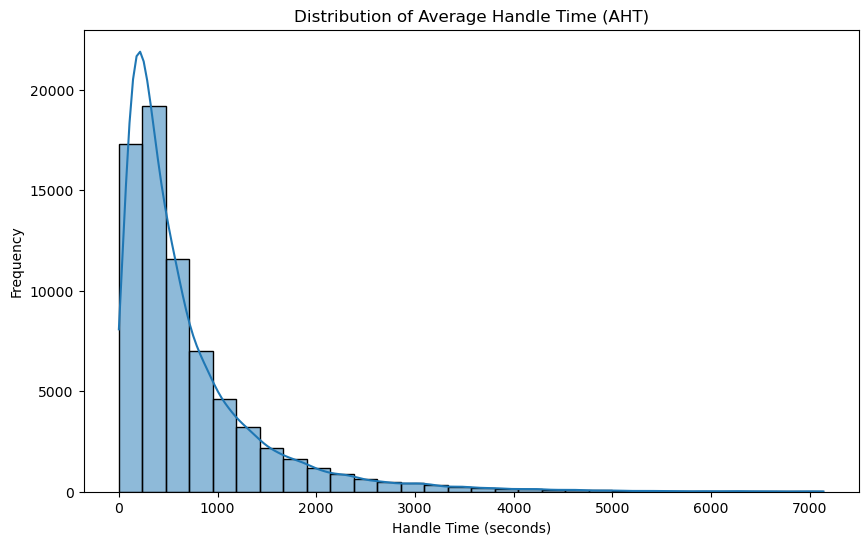

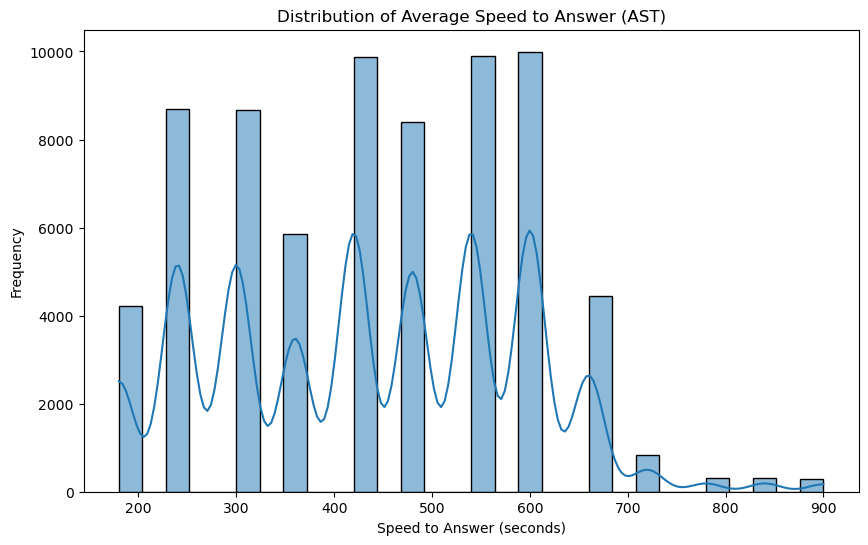

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting AHT distribution
plt.figure(figsize=(10, 6))
sns.histplot(calls['handle_time'], bins=30, kde=True)
plt.title('Distribution of Average Handle Time (AHT)')
plt.xlabel('Handle Time (seconds)')
plt.ylabel('Frequency')
plt.show()

# Plotting AST distribution
plt.figure(figsize=(10, 6))
sns.histplot(calls['waiting_time'], bins=30, kde=True)
plt.title('Distribution of Average Speed to Answer (AST)')
plt.xlabel('Speed to Answer (seconds)')
plt.ylabel('Frequency')
plt.show()

/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_21937/2373284398.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='elite_level_code', data=customers, palette='coolwarm')


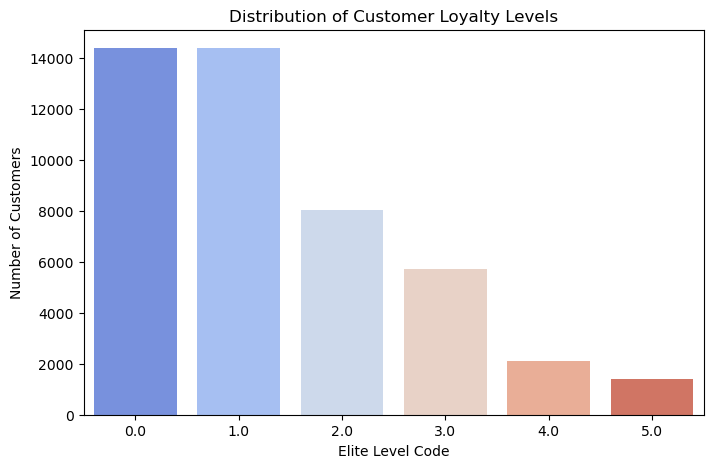

In [20]:
# Plot distribution of customer loyalty levels
plt.figure(figsize=(8, 5))
sns.countplot(x='elite_level_code', data=customers, palette='coolwarm')
plt.title('Distribution of Customer Loyalty Levels')
plt.xlabel('Elite Level Code')
plt.ylabel('Number of Customers')
plt.show()

/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_21937/2887832873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='primary_call_reason', data=reasons, palette='viridis', order=reasons['primary_call_reason'].value_counts().index)


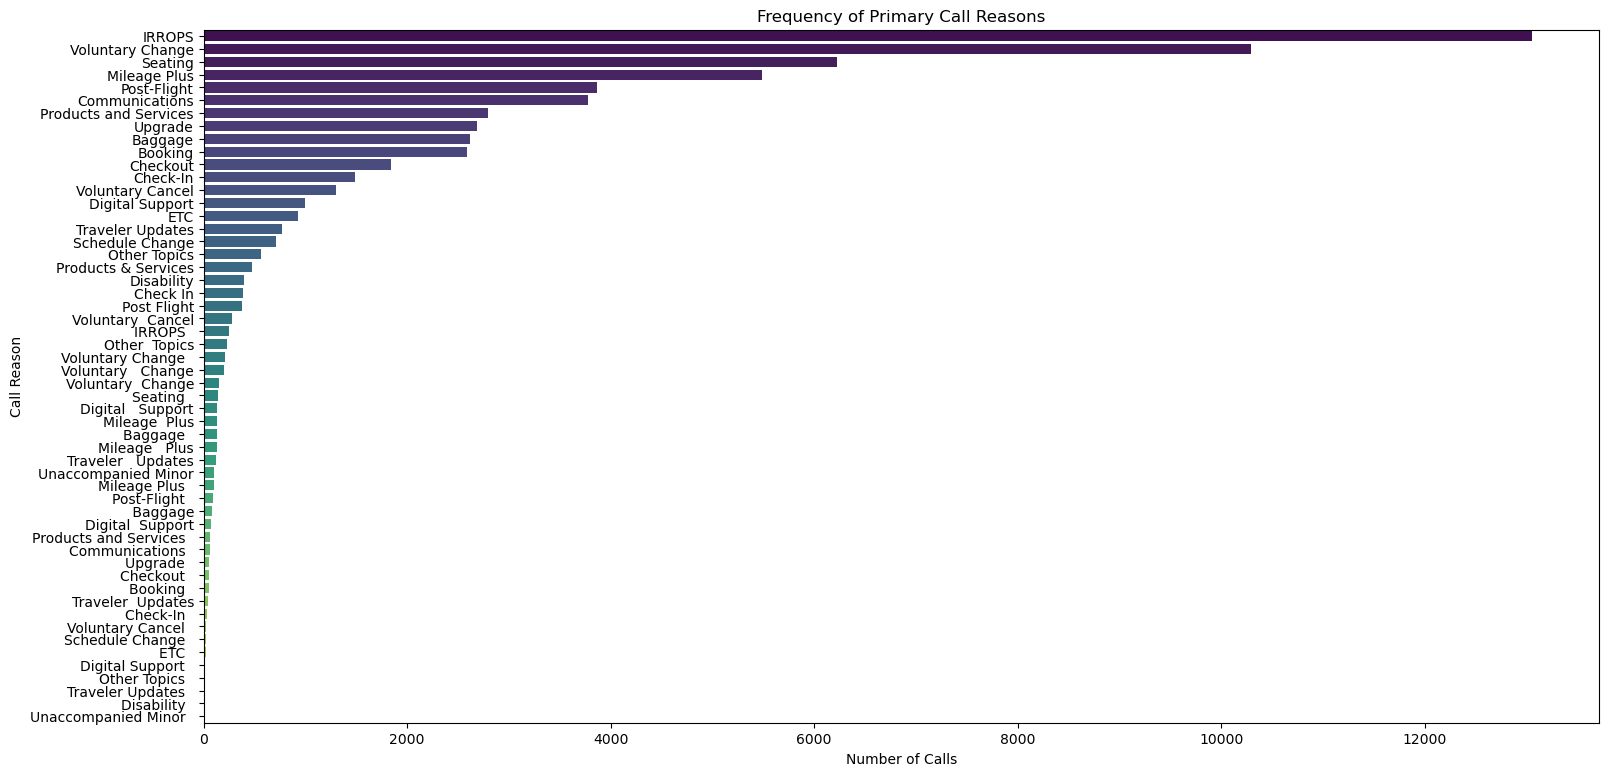

In [21]:
# Countplot of primary call reasons
plt.figure(figsize=(18, 9))
sns.countplot(y='primary_call_reason', data=reasons, palette='viridis', order=reasons['primary_call_reason'].value_counts().index)
plt.title('Frequency of Primary Call Reasons')
plt.xlabel('Number of Calls')
plt.ylabel('Call Reason')
plt.show()


/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_21937/2271542087.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='agent_tone', data=sentiment, palette='Set2')


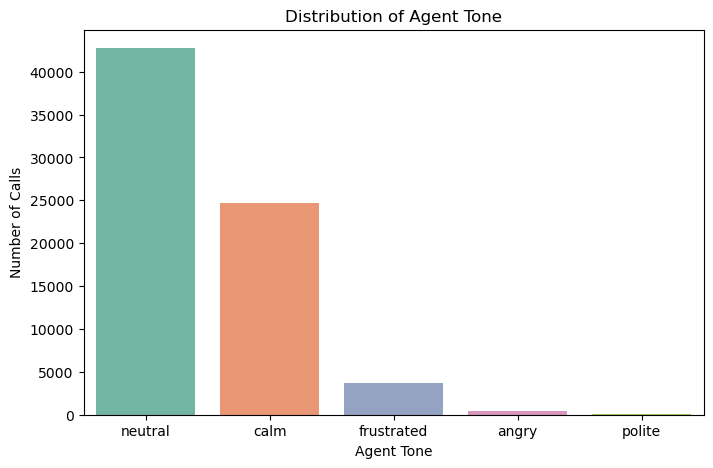

/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_21937/2271542087.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='customer_tone', data=sentiment, palette='Set1')


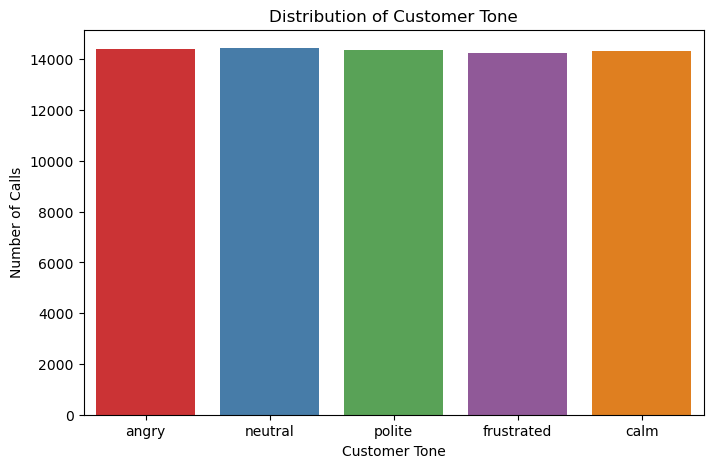

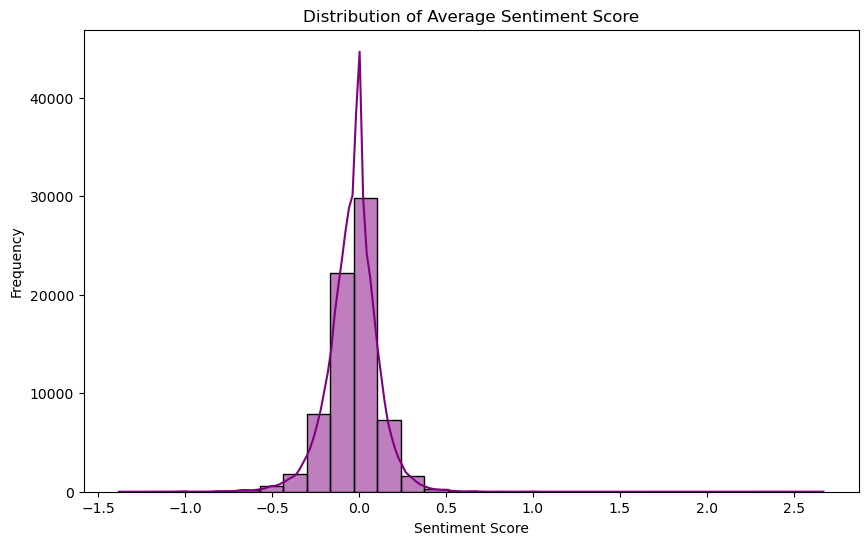

In [22]:
# Plot agent tone distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='agent_tone', data=sentiment, palette='Set2')
plt.title('Distribution of Agent Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Number of Calls')
plt.show()

# Plot customer tone distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='customer_tone', data=sentiment, palette='Set1')
plt.title('Distribution of Customer Tone')
plt.xlabel('Customer Tone')
plt.ylabel('Number of Calls')
plt.show()

# Plot average sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(sentiment['average_sentiment'], bins=30, kde=True, color='purple')
plt.title('Distribution of Average Sentiment Score')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_21937/3406031350.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=['Most Frequent', 'Least Frequent'], y=[most_frequent_handle_time, least_frequent_handle_time], palette='magma')


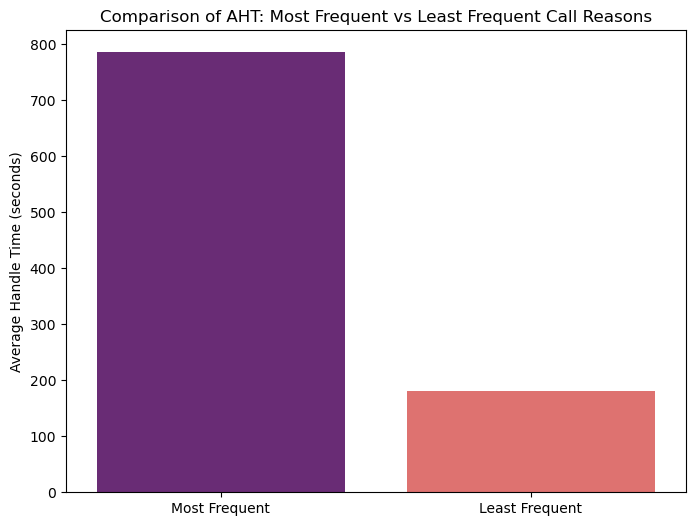

In [23]:
# Bar plot comparing AHT for the most and least frequent call reasons
plt.figure(figsize=(8, 6))
sns.barplot(x=['Most Frequent', 'Least Frequent'], y=[most_frequent_handle_time, least_frequent_handle_time], palette='magma')
plt.title('Comparison of AHT: Most Frequent vs Least Frequent Call Reasons')
plt.ylabel('Average Handle Time (seconds)')
plt.show()

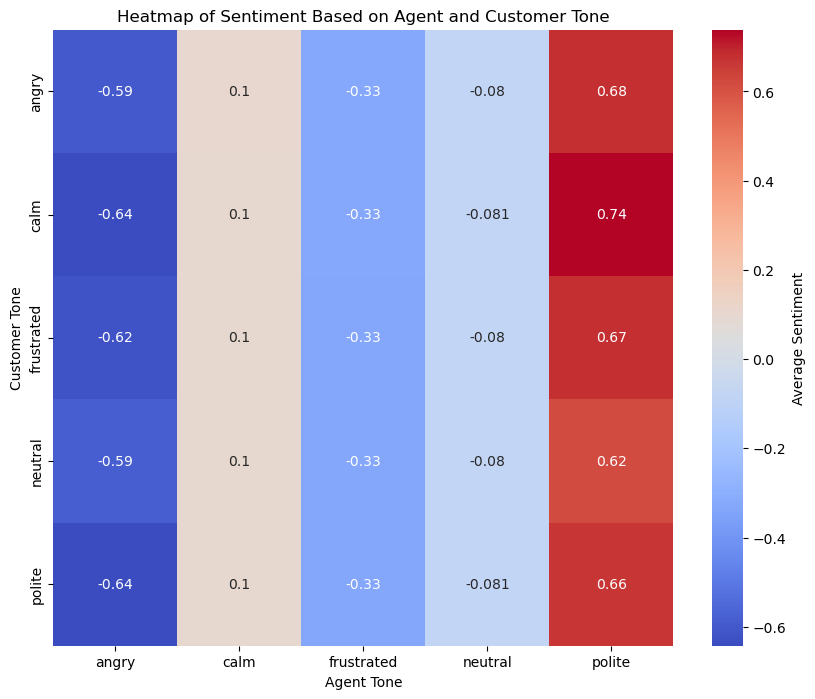

In [24]:
# Create a pivot table for the heatmap
tone_sentiment_pivot = sentiment.pivot_table(index='customer_tone', columns='agent_tone', values='average_sentiment', aggfunc='mean')

# Plot heatmap of average sentiment across agent tone and customer tone
plt.figure(figsize=(10, 8))
sns.heatmap(tone_sentiment_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Average Sentiment'})
plt.title('Heatmap of Sentiment Based on Agent and Customer Tone')
plt.xlabel('Agent Tone')
plt.ylabel('Customer Tone')
plt.show()

/var/folders/nq/999184vs10z8d59n1_268m_c0000gn/T/ipykernel_21937/3865989924.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='primary_call_reason', data=calls_reason, palette='coolwarm', order=calls_reason['primary_call_reason'].value_counts().index)


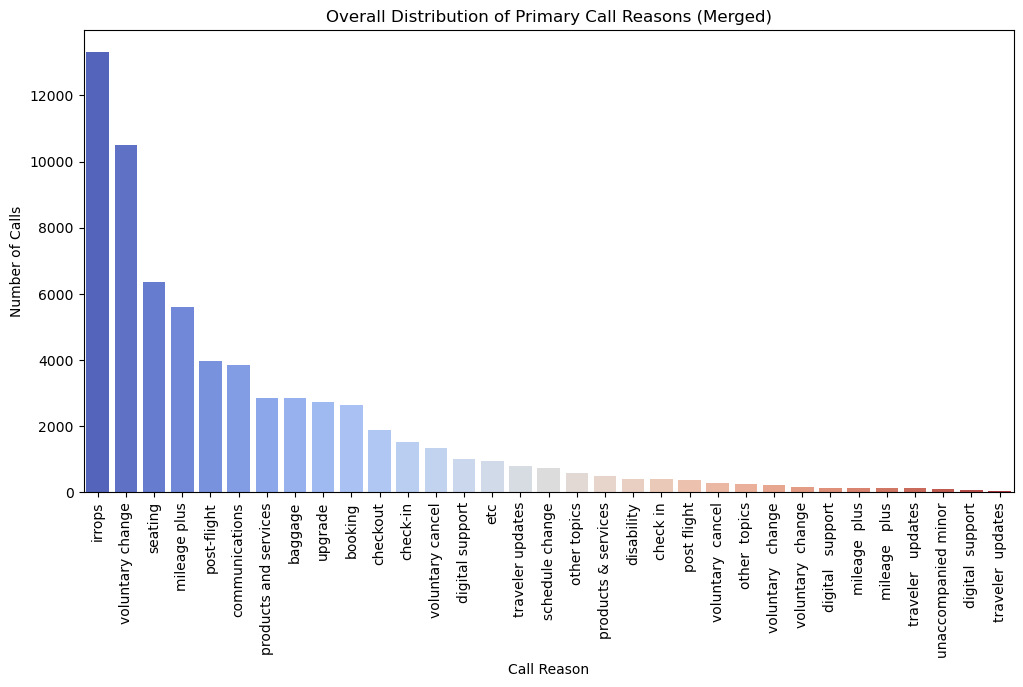

In [26]:


# Standardizing and merging duplicate primary call reasons (example for demo purposes)
calls_reason['primary_call_reason'] = calls_reason['primary_call_reason'].str.strip().str.lower()

# Example of manual mapping to merge similar call reasons (if needed)
# You can update this as per your actual data
calls_reason['primary_call_reason'] = calls_reason['primary_call_reason'].replace({
    'lost baggage': 'baggage issue',
    'missing baggage': 'baggage issue',
    'reservation change': 'flight change',
    'flight modification': 'flight change'
})

# Bar plot with x and y swapped
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_call_reason', data=calls_reason, palette='coolwarm', order=calls_reason['primary_call_reason'].value_counts().index)
plt.title('Overall Distribution of Primary Call Reasons (Merged)')
plt.ylabel('Number of Calls')
plt.xlabel('Call Reason')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()